# Question 5

## A

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def univariate_gaussian(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))


In [ ]:
# Univariate Gaussian parameters
means = [2, 1, 0]
variances = [0.2, 0.5, 2]


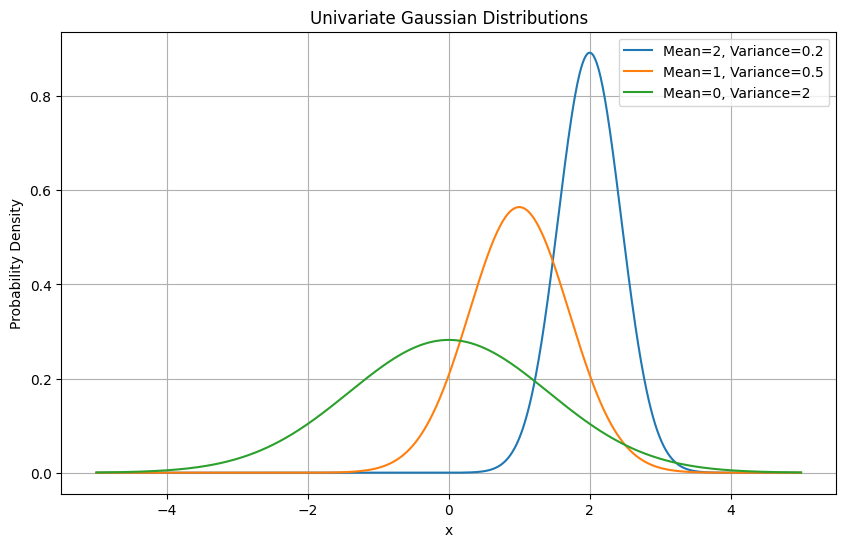

In [ ]:
# Plot univariate Gaussians
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 6))
for mean, variance in zip(means, variances):
    plt.plot(x, univariate_gaussian(x, mean, variance), label=f"Mean={mean}, Variance={variance}")
plt.title("Univariate Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()



## B

In [ ]:
def bivariate_gaussian(x, y, mean, covariance_matrix):
    x_diff = x - mean[0]
    y_diff = y - mean[1]
    covariance_matrix_det = covariance_matrix[0][0] * covariance_matrix[1][1] - covariance_matrix[0][1] * covariance_matrix[1][0]
    inv_covariance_matrix = np.linalg.inv(covariance_matrix)
    exponent = -0.5 * (x_diff * inv_covariance_matrix[0][0] * x_diff + y_diff * inv_covariance_matrix[1][1] * y_diff +
                       (x_diff * inv_covariance_matrix[0][1] + y_diff * inv_covariance_matrix[1][0]) * 2)
    return (1 / (2 * np.pi * np.sqrt(covariance_matrix_det))) * np.exp(exponent)


In [ ]:
# Bivariate Gaussian parameters
mean = [0, 0]
covariance_matrix = [[0.5, 0.8], [0.8, 2.0]]

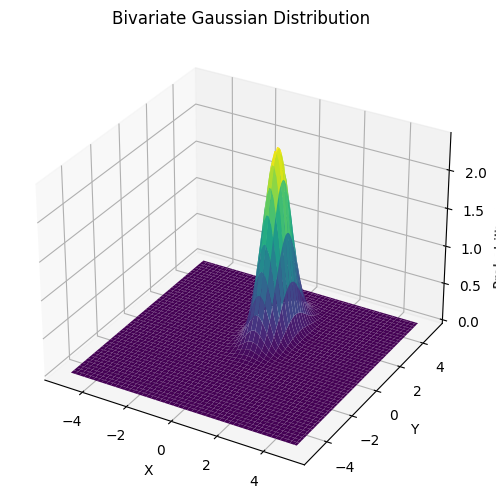

In [ ]:
# Plot bivariate Gaussian
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = bivariate_gaussian(X, Y, mean, covariance_matrix)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Bivariate Gaussian Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.show()


# Question 6

In [ ]:
from scipy.integrate import quad

In [ ]:
def marginal_probability(x):
    return quad(lambda y: bivariate_gaussian(x, y, mean, covariance_matrix), -10, 10)[0]


In [ ]:
# Calculate p(x) for a range of x values
x_values = np.linspace(-5, 5, 100)
p_x_values = [marginal_probability(x) for x in x_values]


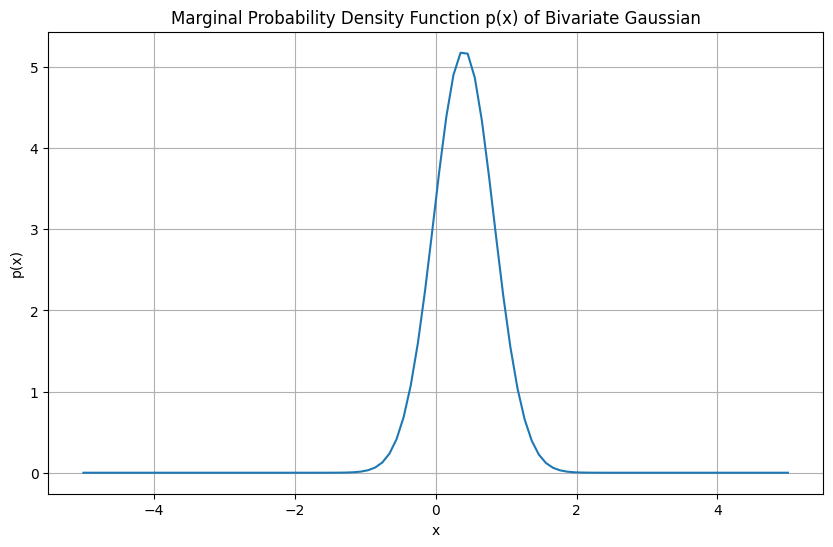

In [ ]:
# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, p_x_values)
plt.title("Marginal Probability Density Function p(x) of Bivariate Gaussian")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)
plt.show()

# Question 7

In [ ]:
from scipy.stats import multivariate_normal


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal




In [ ]:

# Define the bivariate Gaussian parameters
mean = [0, 0]
covariance_matrix = [[0.5, 0.8], [0.8, 2.0]]

# Create a multivariate Gaussian object
bivariate_gaussian = multivariate_normal(mean=mean, cov=covariance_matrix)

# Define y value
y_value = 2.0

# Calculate p(y) by marginalizing p(x, y)
p_y = quad(lambda x: bivariate_gaussian.pdf([x, y_value]), -10, 10)[0]


In [ ]:

# Define the conditional probability function p(x|y)
def conditional_probability(x):
    return bivariate_gaussian.pdf([x, y_value]) / p_y

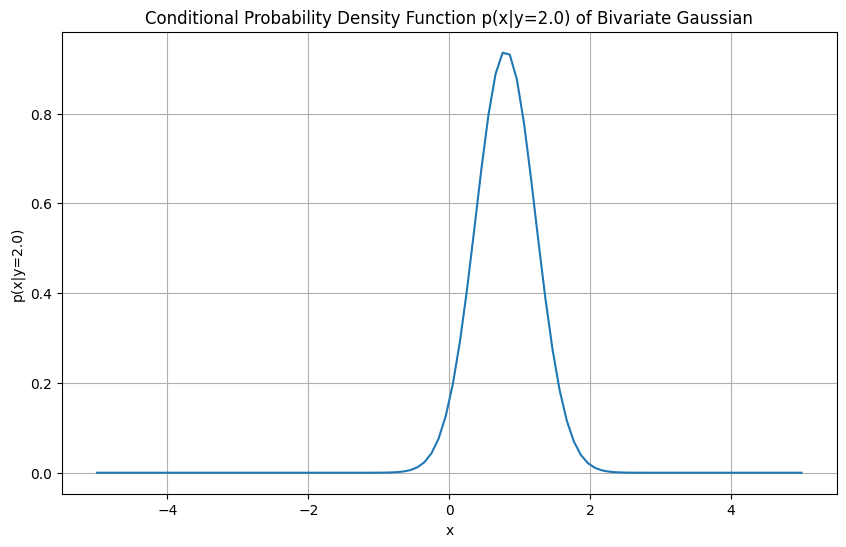

In [ ]:
import numpy as np
# Calculate p(x|y) for a range of x values
x_values = np.linspace(-5, 5, 100)
p_x_given_y_values = [conditional_probability(x) for x in x_values]

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(x_values, p_x_given_y_values)
plt.title("Conditional Probability Density Function p(x|y=2.0) of Bivariate Gaussian")
plt.xlabel("x")
plt.ylabel("p(x|y=2.0)")
plt.grid(True)
plt.show()


# Question 8

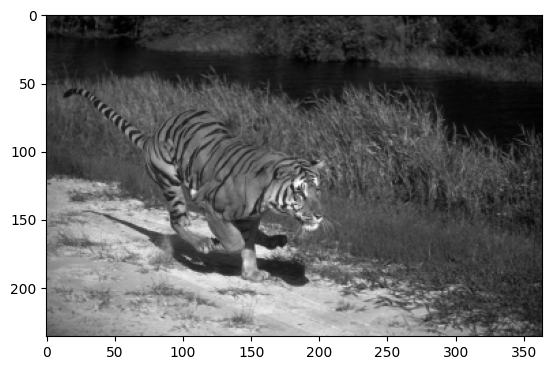

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file
with open('tiger.txt', 'r') as f:
    lines = f.readlines()

# Convert each line into a list of floats
matrix = [list(map(float, line.split())) for line in lines]

# Convert the list of lists into a numpy array
matrix = np.array(matrix)

# Display the matrix as a grayscale image
plt.imshow(matrix, cmap='gray')
plt.show()


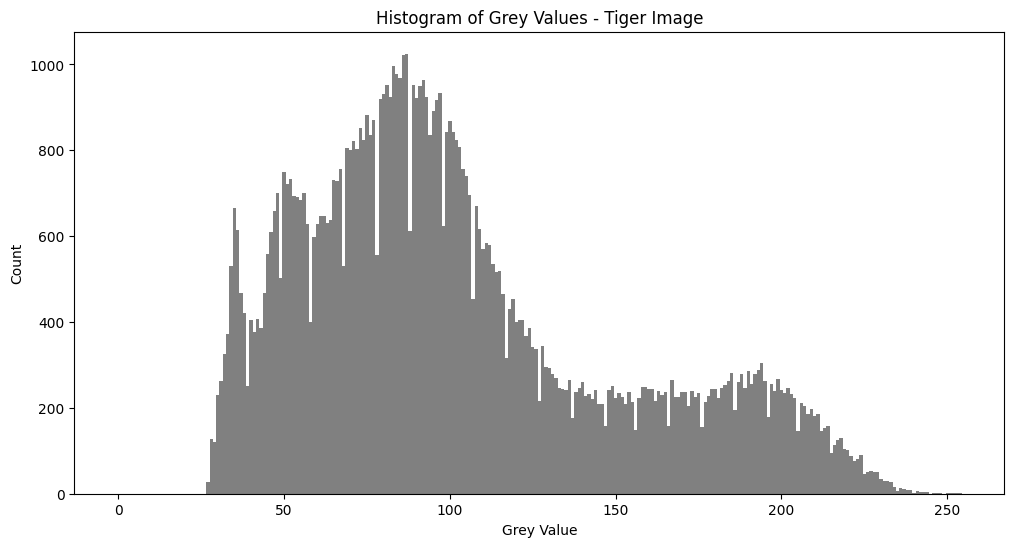

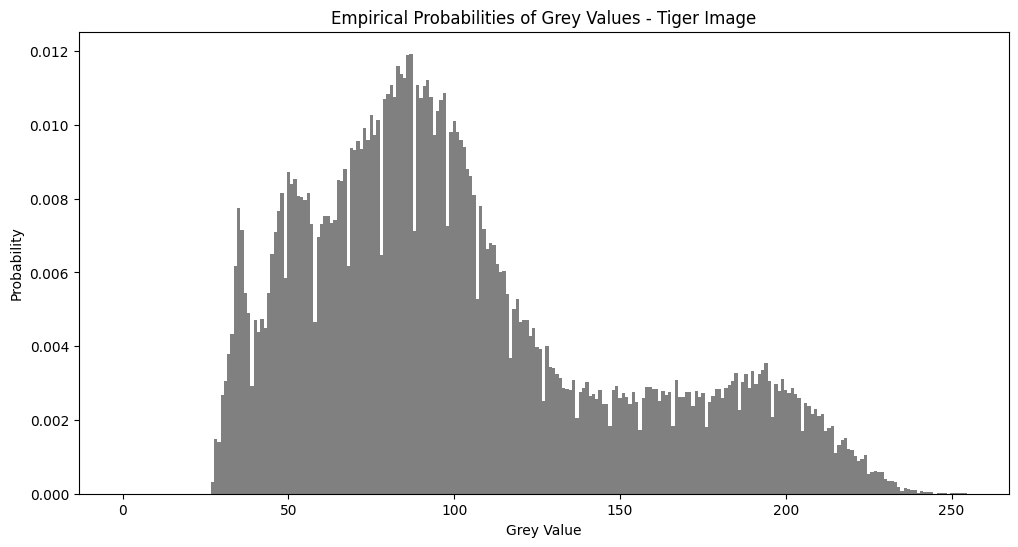

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Read the file
with open('tiger.txt', 'r') as f:
    lines = f.readlines()

# Convert each line into a list of floats
matrix = [list(map(float, line.split())) for line in lines]

# Convert the list of lists into a numpy array
matrix = np.array(matrix)

# Flatten the matrix and scale it to the range 0-255
flattened = (matrix.flatten() * 255).astype(int)

# Create a histogram
counts, bins = np.histogram(flattened, bins=range(256))

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], counts, width=1, color='gray')
plt.title('Histogram of Grey Values - Tiger Image')
plt.xlabel('Grey Value')
plt.ylabel('Count')
plt.show()

# Normalize the counts to get empirical probabilities
probabilities = counts / counts.sum()

# Plot the empirical probabilities
plt.figure(figsize=(12, 6))
plt.bar(bins[:-1], probabilities, width=1, color='gray')
plt.title('Empirical Probabilities of Grey Values - Tiger Image')
plt.xlabel('Grey Value')
plt.ylabel('Probability')
plt.show()


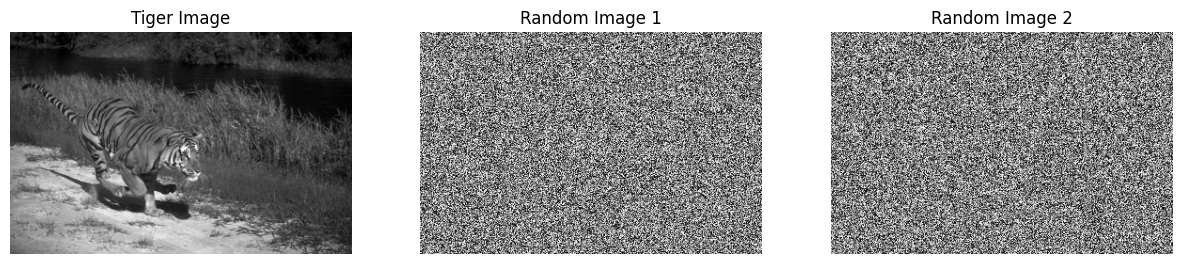

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the dimensions of the images
width, height = 236, 364

# Create two random images
image1 = np.random.randint(0, 256, (width, height))
image2 = np.random.randint(0, 256, (width, height))

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the tiger image
axs[0].imshow(matrix, cmap='gray')
axs[0].set_title('Tiger Image')

# Display the first random image
axs[1].imshow(image1, cmap='gray')
axs[1].set_title('Random Image 1')

# Display the second random image
axs[2].imshow(image2, cmap='gray')
axs[2].set_title('Random Image 2')

# Remove the axes for all subplots
for ax in axs:
    ax.axis('off')

plt.show()
